In [1]:
import os
import matplotlib.pyplot as plt
import cv2
from pyStitch import *
from sklearn.decomposition import PCA

In [2]:
path = "D:/04_DATA/01_LIVE_BACTERIAL_IMAGING/230510/"
dir_names = os.listdir("D:/04_DATA/01_LIVE_BACTERIAL_IMAGING/230510")
filtered = [d for d in dir_names if ("image3"  in d and "log" in d)]

In [3]:
images = [tile.channels[1][35,:,:] for tile in tiles]

NameError: name 'tiles' is not defined

In [133]:
images[0].shape

(896, 600)

In [134]:
stitcher = cv2.Stitcher.create()
(status, stitched_image) = stitcher.stitch(images)

In [135]:
status

1

In [124]:
tiles = [parse_file(path, f) for f in filtered]

In [6]:
im1 = Image(tiles)

In [8]:
im1.stitchatron_9000()

In [9]:
max_proj = np.max(im1.canvas[0,:,:,:], axis=0)

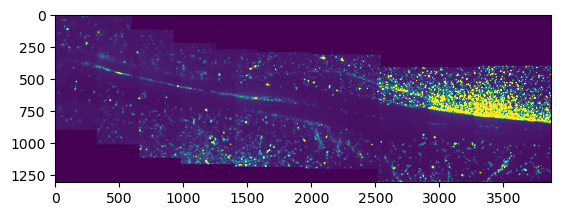

In [10]:
plt.imshow(max_proj, vmin=0, vmax=50, cmap="viridis")
plt.savefig("test_img.png", dpi=1200)

In [14]:
cv2.imwritemulti("./image.tif", im1.canvas[0,:,:,:])

True

In [114]:
img = plt.imread("./MAX_image.tif")
img.shape

(1304, 3874, 4)

In [115]:
img = img[:,:,1]

In [117]:
cv2.imwrite("./im_test.tif", img)

True

In [116]:
img = img[:,:,0].flatten()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [107]:
img = img.reshape(1,5051696)

In [80]:
img.shape

(1, 5051696)

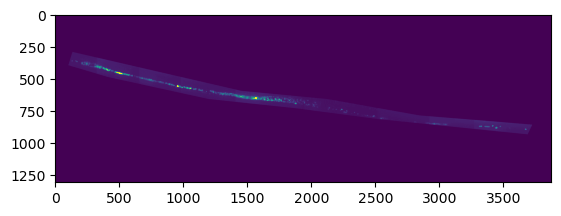

In [44]:
plt.imshow(img[:,:,1], vmin=0, vmax=50)

In [49]:
img = img[:,:,0]

In [108]:
Imean = img.mean(0)
Istd = img.std(0)
Istd[Istd==0] = 1

img = (img-Imean) / Istd

U,S,V = np.linalg.svd(img, full_matrices=False)
S = S ** 2
V=V.T
U.shape, S.shape, V.shape

((1, 1), (1,), (5051696, 1))